In [8]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 
pd.set_option('display.max_rows', 500)
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [9]:
from sklearn.model_selection import learning_curve
def evaluate(model, chosen_scoring="accuracy", names= "Default"):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("Confusion_matrix : ")
    print(confusion_matrix(y_test, y_pred))
    print("Cassification_report : ")
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train_scaled, y_train, cv =3, scoring = chosen_scoring, train_sizes = np.linspace(0.1, 1, 10))
    plt.figure(figsize=(10, 6))
    plt.plot(N, train_score.mean(axis= 1), label = 'train score')
    plt.xlabel("Data Set %")
    plt.plot(N, val_score.mean(axis= 1), label = 'val score')
    plt.ylabel(chosen_scoring)
    plt.title(names)
    plt.legend()
    plt.show()

In [10]:
files = [file for file in os.listdir("assets/best_models/cryptos")]
for file in files:
    print(file)
files2 = [file2 for file2 in os.listdir("assets/best_models/nasdaq")]
for file2 in files2:
    print(file2)

année_2018_flat_DF.csv
année_2021_Oct_DF.csv
covid_DF.csv
année_2018_DF.csv
rdm2_DF.csv
année_2019_flat_DF.csv
ukr_war_DF.csv
année_2021_Nov_DF.csv
rdm1_DF.csv
rdm3_DF.csv
année_2018_flat_DF.csv
année_2021_Oct_DF.csv
subprimes_DF.csv
new_millennium_DF.csv
covid_DF.csv
année_2018_DF.csv
rdm2_DF.csv
année_2019_flat_DF.csv
ukr_war_DF.csv
année_2021_Nov_DF.csv
rdm1_DF.csv
rdm3_DF.csv


In [11]:
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("assets/best_models/cryptos/"+file, index_col = [0])
    all_data = pd.concat([all_data, df])
for file2 in files2:
    df = pd.read_csv("assets/best_models/nasdaq/"+file2, index_col = [0])
    all_data = pd.concat([all_data, df])
all_data = all_data.reset_index()
all_data = all_data.drop(['index'], axis = 1)

In [12]:
all_data['algo'].value_counts(normalize=True)

BestMarkowitz    0.560
BCRP             0.288
?                0.152
Name: algo, dtype: float64

In [13]:
all_data['algo'].value_counts()

BestMarkowitz    70
BCRP             36
?                19
Name: algo, dtype: int64

In [14]:
#X = all_data[['volatility', 'range']]
all_data['algo'] = all_data['algo'].replace({"BestMarkowitz": 2, "BCRP": 0, "?": 0})
#all_data['volatility2'] = all_data['volatility']**2

In [15]:
all_data['market'] = all_data['market'].replace({'Nasdaq': 1, 'Crypto': 0})

TypeError: label_binarize() missing 1 required positional argument: 'y'

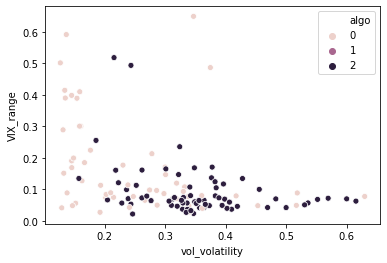

In [16]:
sns.scatterplot(x = 'vol_volatility',y = 'VIX_range', hue = 'algo', data = all_data)
plt.savefig('Regis.jpg')

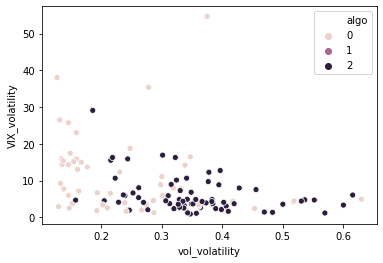

In [17]:
sns.scatterplot(x = 'vol_volatility',y = 'VIX_volatility', hue = 'algo', data = all_data)
plt.savefig('Regis.jpg')

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

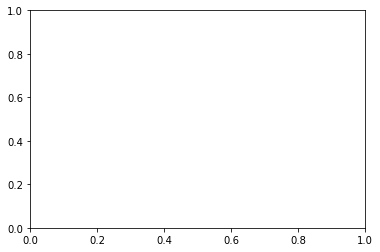

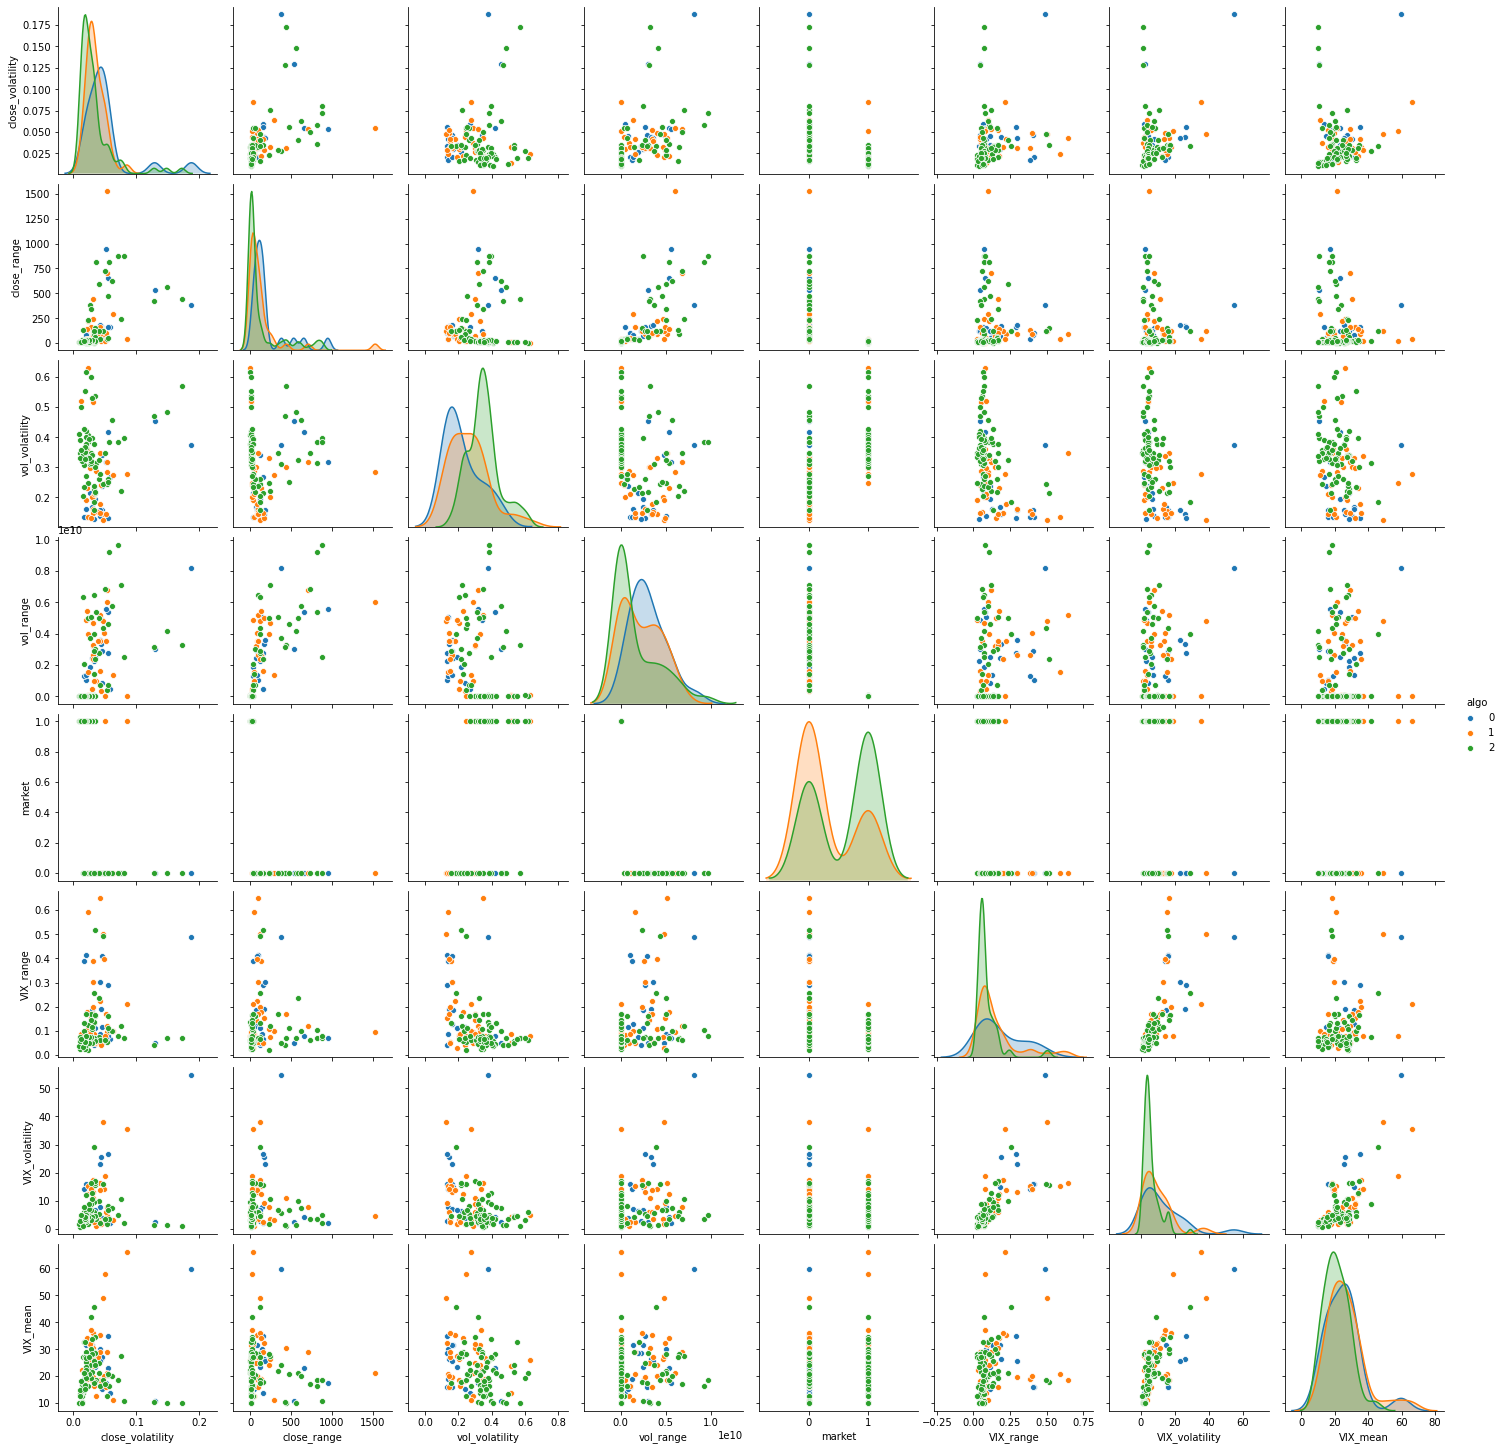

In [11]:
sns.pairplot(data = all_data, hue = 'algo')

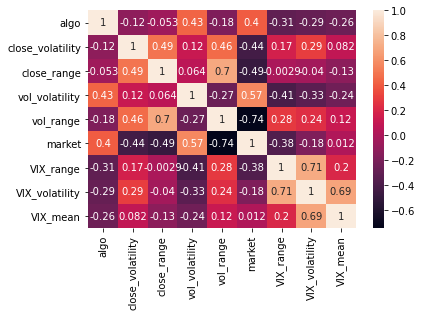

In [18]:
sns.heatmap(all_data.corr(), annot = True);
plt.savefig('Dagobert.jpg')

In [19]:
X = all_data.drop(['algo'], axis = 1)
y = all_data['algo']

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
"""from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit_transform(X)"""

'from sklearn.preprocessing import PolynomialFeatures\npoly = PolynomialFeatures(2)\npoly.fit_transform(X)'

In [22]:
X_scaled = scaler.fit_transform(X)

'from sklearn.preprocessing import PolynomialFeatures\npoly = PolynomialFeatures(2)\npoly.fit_transform(X)'

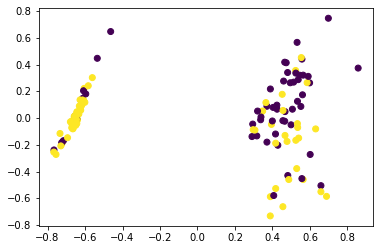

In [23]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
X_pca = pca_2.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c = y)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))
print(model.predict(X_test_scaled))
y_test

1.0
0.46875
[2 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 0 0 0 2 2 2 2 2 2 2 0 0 0 2 2 2]


18     0
42     2
36     2
76     0
53     0
91     0
56     0
123    2
93     2
4      2
27     0
116    0
44     2
96     2
19     0
77     2
10     0
101    2
11     2
114    2
47     0
78     2
0      0
26     0
31     0
67     0
12     2
24     0
45     2
108    2
89     2
73     2
Name: algo, dtype: int64

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))
print(model.predict(X_test_scaled))
print(y_test)

0.7634408602150538
0.6875
[0 0 0 2 0 2 0 2 2 0 0 2 2 2 0 0 0 2 0 2 0 2 0 0 2 0 0 0 2 2 2 2]
18     0
42     2
36     2
76     0
53     0
91     0
56     0
123    2
93     2
4      2
27     0
116    0
44     2
96     2
19     0
77     2
10     0
101    2
11     2
114    2
47     0
78     2
0      0
26     0
31     0
67     0
12     2
24     0
45     2
108    2
89     2
73     2
Name: algo, dtype: int64


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2])

82     1
61     0
78     2
8      0
40     2
94     1
64     0
112    2
74     2
7      1
122    2
14     2
65     2
117    2
111    2
30     1
22     2
32     2
114    2
101    2
98     2
58     2
59     2
75     2
52     1
47     1
91     1
96     2
42     2
72     2
34     0
92     1
Name: algo, dtype: int64

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [37]:
RandomForest = make_pipeline(RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(AdaBoostClassifier(random_state=0))
SVM = make_pipeline(SVC(random_state=0))
KNN = make_pipeline(KNeighborsClassifier(3))

In [38]:
dict_of_model = {"RDF": RandomForest, 'Adabo': AdaBoost, 'SVM': SVM, 'KNN' : KNN}

RDF
Confusion_matrix : 
[[ 7  8]
 [ 4 13]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.64      0.47      0.54        15
           2       0.62      0.76      0.68        17

    accuracy                           0.62        32
   macro avg       0.63      0.62      0.61        32
weighted avg       0.63      0.62      0.62        32



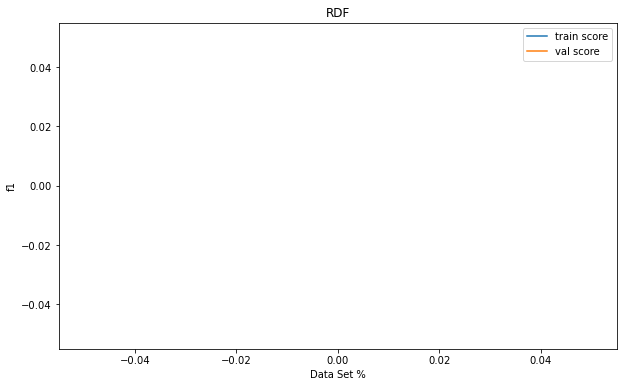

Adabo
Confusion_matrix : 
[[6 9]
 [8 9]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.43      0.40      0.41        15
           2       0.50      0.53      0.51        17

    accuracy                           0.47        32
   macro avg       0.46      0.46      0.46        32
weighted avg       0.47      0.47      0.47        32



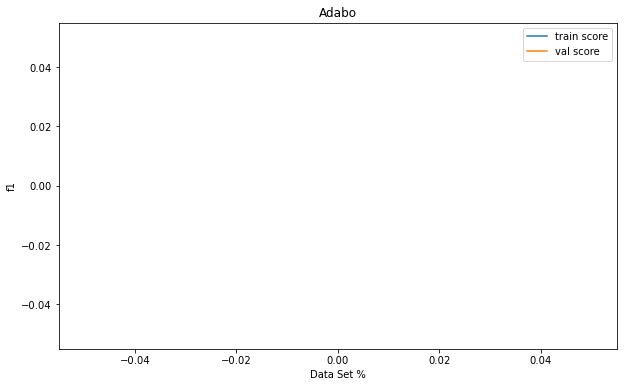

SVM
Confusion_matrix : 
[[13  2]
 [ 3 14]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           2       0.88      0.82      0.85        17

    accuracy                           0.84        32
   macro avg       0.84      0.85      0.84        32
weighted avg       0.85      0.84      0.84        32



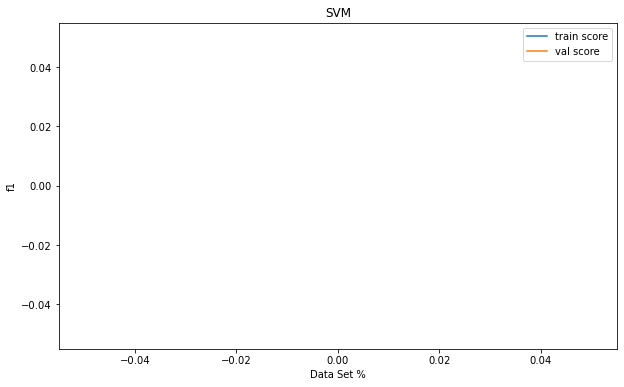

KNN
Confusion_matrix : 
[[ 8  7]
 [ 6 11]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        15
           2       0.61      0.65      0.63        17

    accuracy                           0.59        32
   macro avg       0.59      0.59      0.59        32
weighted avg       0.59      0.59      0.59        32



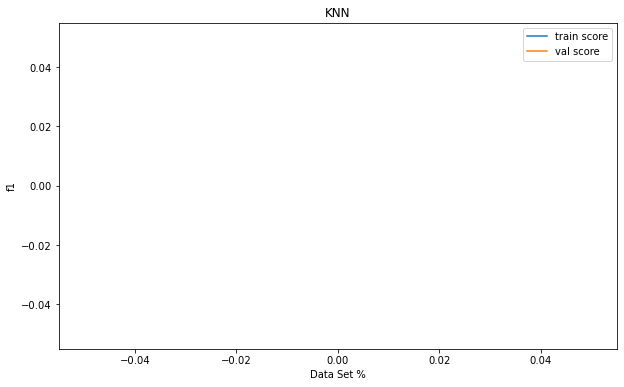

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
for name, model in dict_of_model.items():
    print(name)
    evaluate(model, "f1", name)

0.7849462365591398
0.53125
[2 1 0 1 2 0 2 2 2 2 2 1 2 1 2 2 2 2 2 0 2 2 1 1 0 2 2 1 2 2 1 1]
Confusion_matrix : 
[[ 1  4  2]
 [ 2  4  5]
 [ 1  1 12]]
Cassification_report : 
              precision    recall  f1-score   support

           0       0.25      0.14      0.18         7
           1       0.44      0.36      0.40        11
           2       0.63      0.86      0.73        14

    accuracy                           0.53        32
   macro avg       0.44      0.45      0.44        32
weighted avg       0.48      0.53      0.50        32



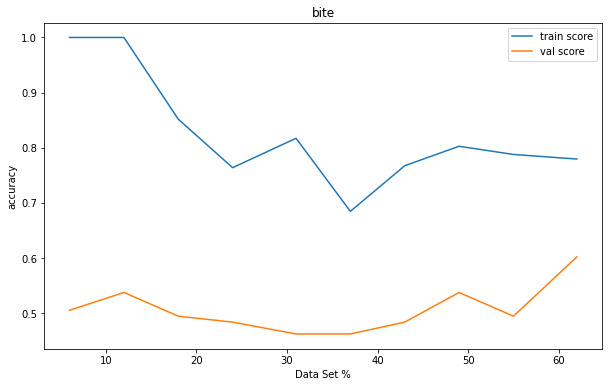

In [45]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))
print(model.predict(X_test_scaled))
y_test
chosen_scoring = "accuracy"
names = 'bite'
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Confusion_matrix : ")
print(confusion_matrix(y_test, y_pred))
print("Cassification_report : ")
print(classification_report(y_test, y_pred))
N, train_score, val_score = learning_curve(model, X_train_scaled, y_train, cv =3, scoring = chosen_scoring, train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(10, 6))
plt.plot(N, train_score.mean(axis= 1), label = 'train score')
plt.xlabel("Data Set %")
plt.plot(N, val_score.mean(axis= 1), label = 'val score')
plt.ylabel(chosen_scoring)
plt.title(names)
plt.legend()
plt.show()